# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import pandas as pd
import citipy
import random
import time

from citipy import citipy
from api_keys import weather_api_key
from datetime import date
from scipy.stats import linregress

## Generate Cities List

In [2]:
locations = pd.DataFrame()


locations['Latitude'] = []
locations['Latitude'] = []
value = float

lat = []
lng = []

for x in range(1500):
    value = random.randint(-90, 90)
    lat.append(value)
    
for x in range(1500):
    value = random.randint(-180, 180)
    lng.append(value)

# combinne them into a single dataframe
locations['Latitude'] = lat
locations['Longitude'] = lng

cities = []

locations['Locations'] = list(zip(locations['Latitude'], locations['Longitude']))

# Loop through the list of locations to get the nearby cities
for location in locations['Locations']:
    lan, lng = location
    city = citipy.nearest_city(lan, lng).city_name
    if city not in cities:
          cities.append(city)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

filter_cities = []
lon = []
lat = []
temp_max = []
humidity = []
clouds = []
wind_speed = []
country = []
dt = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        dt.append(response['dt'])
        filter_cities.append(city)
        print(city)
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    
    time.sleep(1.5) # Sleep for 1.5 seconds



gogrial
cape town
vallenar
padang
pevek
rengo
zeya
punta arenas
mataura
alofi
shuangcheng
albany
yellowknife
bredasdorp
ushuaia
bachaquero
pointe michel
rocha
oum hadjer
Missing field/result... skipping.
opuwo
lae
lavrentiya
Missing field/result... skipping.
chokurdakh
roma
kerema
sharlyk
Missing field/result... skipping.
hobart
harrismith
atuona
butaritari
srednekolymsk
rikitea
Missing field/result... skipping.
broome
carnarvon
margate
binzhou
pacific grove
vrangel
port moresby
khatanga
laguna
cerrito
busselton
bluff
Missing field/result... skipping.
bethel
te anau
saint-pierre
darhan
severo-kurilsk
Missing field/result... skipping.
vaini
qaanaaq
Missing field/result... skipping.
codrington
avarua
pangkalanbuun
sitka
saldanha
Missing field/result... skipping.
georgetown
yar-sale
thunder bay
cairns
ahipara
nikolskoye
rio gallegos
ilanskiy
arraial do cabo
trinidad
esfahan
dikson
port blair
kijang
berlevag
svetlyy
chuy
ulladulla
fortuna
harnosand
naze
cherskiy
coihaique
hilo
whitehorse
k

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:


city_data_df = pd.DataFrame({'City': filter_cities, 
                             'Lat': lat,
                             'Lng': lon,
                             'Max Temp': temp_max,
                             'Humidity': humidity,
                             'Cloudiness': clouds,
                             'Wind Speed': wind_speed,
                             'Country': country,
                             'Date': dt
                             })

city_data_df.to_csv("../output_data/my_cities.csv")

city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gogrial,8.5332,28.1004,29.72,60,99,1.56,SS,1627566763
1,cape town,-33.9258,18.4232,15.06,90,75,0.45,ZA,1627566765
2,vallenar,-28.5708,-70.7581,18.65,22,0,0.64,CL,1627566767
3,padang,-0.9492,100.3543,25.03,84,94,0.93,ID,1627566000
4,pevek,69.7008,170.3133,0.30,97,100,12.04,RU,1627566771
...,...,...,...,...,...,...,...,...,...
559,mazabuka,-15.8560,27.7480,23.15,25,48,4.33,ZM,1627567940
560,istisu,40.9457,48.0738,22.11,59,46,2.09,AZ,1627567942
561,winnemucca,40.9730,-117.7357,17.03,34,1,0.00,US,1627567944
562,havre-saint-pierre,50.2334,-63.5986,11.55,83,100,3.04,CA,1627567946


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Remove rows with humidity greater than 100%
city_data_filtered_df =city_data_df.loc[city_data_df['Humidity'] < 100.1]
city_data_filtered_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gogrial,8.5332,28.1004,29.72,60,99,1.56,SS,1627566763
1,cape town,-33.9258,18.4232,15.06,90,75,0.45,ZA,1627566765
2,vallenar,-28.5708,-70.7581,18.65,22,0,0.64,CL,1627566767
3,padang,-0.9492,100.3543,25.03,84,94,0.93,ID,1627566000
4,pevek,69.7008,170.3133,0.30,97,100,12.04,RU,1627566771
...,...,...,...,...,...,...,...,...,...
559,mazabuka,-15.8560,27.7480,23.15,25,48,4.33,ZM,1627567940
560,istisu,40.9457,48.0738,22.11,59,46,2.09,AZ,1627567942
561,winnemucca,40.9730,-117.7357,17.03,34,1,0.00,US,1627567944
562,havre-saint-pierre,50.2334,-63.5986,11.55,83,100,3.04,CA,1627567946


In [10]:
#  Get the indices of cities that have humidity over 100%.
# Get rows with humidity greater than 100%
city_data_greater100per_df = city_data_df.loc[city_data_df['Humidity'] > 100]
city_data_greater100per_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data_df = city_data_df.loc[city_data_df.index != 129]

clean_city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gogrial,8.5332,28.1004,29.72,60,99,1.56,SS,1627566763
1,cape town,-33.9258,18.4232,15.06,90,75,0.45,ZA,1627566765
2,vallenar,-28.5708,-70.7581,18.65,22,0,0.64,CL,1627566767
3,padang,-0.9492,100.3543,25.03,84,94,0.93,ID,1627566000
4,pevek,69.7008,170.3133,0.30,97,100,12.04,RU,1627566771
...,...,...,...,...,...,...,...,...,...
559,mazabuka,-15.8560,27.7480,23.15,25,48,4.33,ZM,1627567940
560,istisu,40.9457,48.0738,22.11,59,46,2.09,AZ,1627567942
561,winnemucca,40.9730,-117.7357,17.03,34,1,0.00,US,1627567944
562,havre-saint-pierre,50.2334,-63.5986,11.55,83,100,3.04,CA,1627567946


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

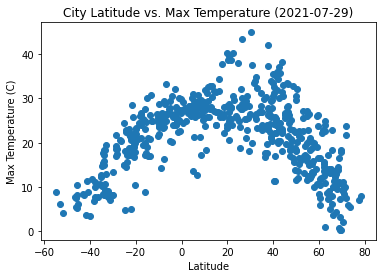

In [12]:
# Plot the latitude versus temperature
today = date.today()
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['Max Temp'])

plt.savefig('C:/Users/jjel0\OneDrive/Homework/python-api-challenge/output_data/LatVsTempFig')

plt.show()



## Latitude vs. Humidity Plot

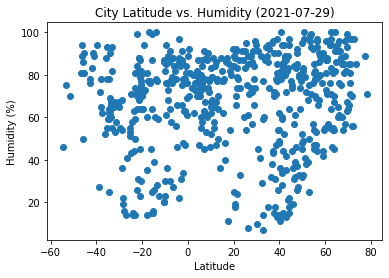

In [13]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['Humidity'])

plt.savefig('C:/Users/jjel0\OneDrive/Homework/python-api-challenge/output_data/LatVsHumidityFig')

plt.show()

## Latitude vs. Cloudiness Plot

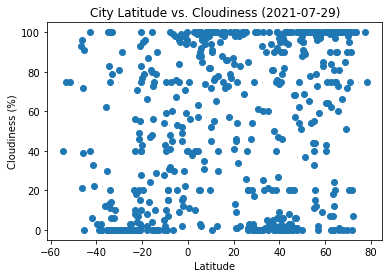

In [14]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['Cloudiness'])

plt.savefig('C:/Users/jjel0\OneDrive/Homework/python-api-challenge/output_data/LatVsCloudinessFig')

plt.show()

## Latitude vs. Wind Speed Plot

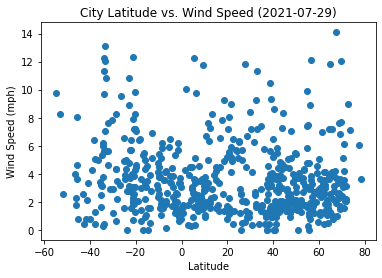

In [15]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(clean_city_data_df['Lat'], clean_city_data_df['Wind Speed'])

plt.savefig('C:/Users/jjel0\OneDrive/Homework/python-api-challenge/output_data/LatVsWindSpeedFig')

plt.show()

## Linear Regression

In [16]:
# Create a dataframe for the Northern Hemisphere and one for the Southern Hemisphere
clean_city_data_SH_df = pd.DataFrame()
clean_city_data_NH_df = pd.DataFrame()
#

clean_city_data_NH_df = clean_city_data_df[clean_city_data_df['Lat'] > 0]
clean_city_data_SH_df = clean_city_data_df[clean_city_data_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6658


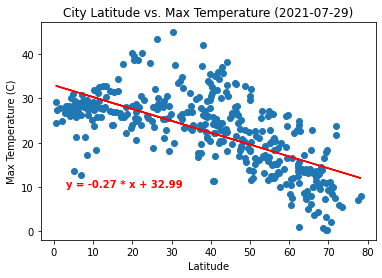

In [17]:
# Plot the latitude versus temperature
today = date.today()
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.scatter(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Max Temp'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Max Temp'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_NH_df['Lat'] + intercept
plt.plot(clean_city_data_NH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(3, 10, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.833


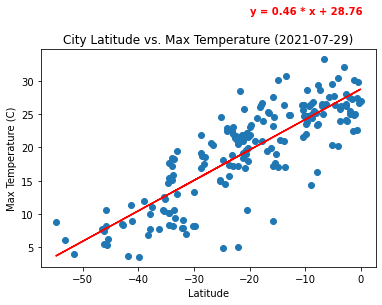

In [18]:
# Plot the latitude versus temperature
today = date.today()
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.scatter(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Max Temp'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Max Temp'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_SH_df['Lat'] + intercept
plt.plot(clean_city_data_SH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(-20, 40, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0685


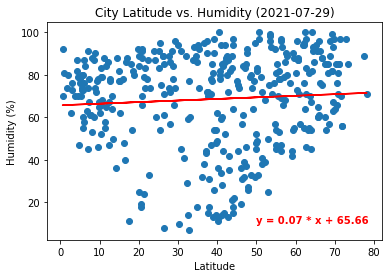

In [19]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Humidity'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Humidity'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_NH_df['Lat'] + intercept
plt.plot(clean_city_data_NH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(50, 10, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.0149


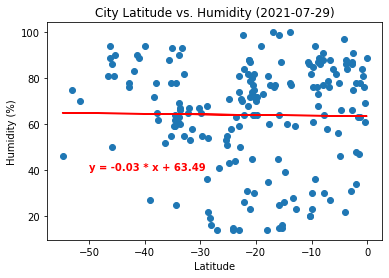

In [20]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.scatter(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Humidity'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Humidity'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_SH_df['Lat'] + intercept
plt.plot(clean_city_data_SH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(-50, 40, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0276


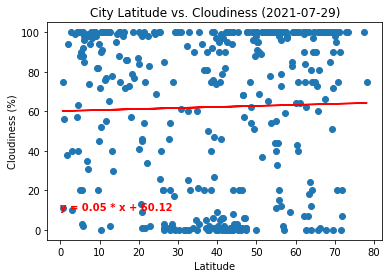

In [21]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Cloudiness'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Cloudiness'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_NH_df['Lat'] + intercept
plt.plot(clean_city_data_NH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(0, 10, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1499


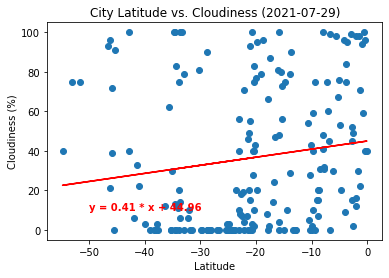

In [22]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.scatter(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Cloudiness'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Cloudiness'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_SH_df['Lat'] + intercept
plt.plot(clean_city_data_SH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(-50, 10, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0008


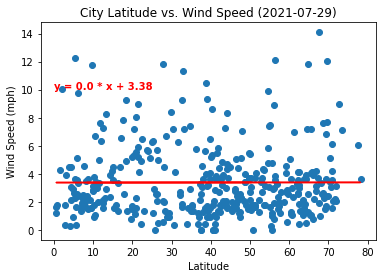

In [23]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Wind Speed'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_NH_df['Lat'], clean_city_data_NH_df['Wind Speed'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_NH_df['Lat'] + intercept
plt.plot(clean_city_data_NH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(0, 10, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2312


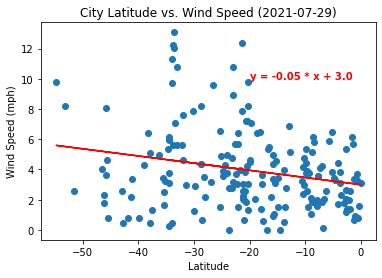

In [24]:
# Plot the latitude versus humidity

plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.scatter(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Wind Speed'])

# Get the regression data
(slope, intercept, rvalue, pvalue, stderr) = linregress(clean_city_data_SH_df['Lat'], clean_city_data_SH_df['Wind Speed'])

# Print the correlation coefficient
print(f"The r-value is: {round(rvalue, 4)}")

# Create the line for the regression data and plot them
tv_vs_wt_fit = slope * clean_city_data_SH_df['Lat'] + intercept
plt.plot(clean_city_data_SH_df['Lat'],tv_vs_wt_fit,'-', color='r');

# add the regression 
plt.text(-20, 10, f"y = {round(slope, 2)} * x + {round(intercept, 2)}", horizontalalignment='left', size='medium', color='r', weight='semibold')

plt.show()